Import các thư viện cần thiết

# 1|Các bước tiền sử lý


### 1.1 Import các thư viện cần thiết

In [ ]:
#import các thư viện cần thiết
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error


### 1.2 Import file

In [ ]:
#read the data file
housing = pd.read_csv("/content/sample_data/housingmachinelearning.csv")


# 2 | Dataframe Investigation

# 2.1 Basic steps

In [ ]:
housing.shape


(10000, 10)

In [ ]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10000 non-null  float64
 1   latitude            10000 non-null  float64
 2   housing_median_age  10000 non-null  int64  
 3   total_rooms         10000 non-null  int64  
 4   total_bedrooms      9900 non-null   float64
 5   population          10000 non-null  int64  
 6   households          10000 non-null  int64  
 7   median_income       10000 non-null  float64
 8   median_house_value  10000 non-null  int64  
 9   ocean_proximity     10000 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 781.4+ KB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,10000.000000,10000.000000,10000.000000,10000.000000,9900.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-119.472328,35.493820,31.847100,2432.295700,516.539091,1395.588700,483.741600,3.718040,204948.988000
std,1.808913,1.959545,11.821967,2031.099966,407.888407,1090.838717,379.011614,1.916912,116594.980397
min,-124.350000,32.670000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.590000,34.010000,23.000000,1355.000000,286.000000,779.750000,271.000000,2.411900,117975.000000
50%,-118.410000,34.170000,33.000000,1962.000000,416.000000,1137.500000,390.000000,3.328900,176600.000000
75%,-118.210000,37.630000,40.000000,2865.000000,617.250000,1687.000000,576.000000,4.544825,258025.000000
max,-114.550000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


### 2.2 Check Null and delet column

In [ ]:
# check Null
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        100
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# xóa cột chứa null
housing=housing.dropna()

In [ ]:
 #điền giá trị trung bình (median) của cột 'total_bedrooms' vào những ô có giá trị thiếu (NaN) trong cột đó.
#housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9900 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9900 non-null   float64
 1   latitude            9900 non-null   float64
 2   housing_median_age  9900 non-null   int64  
 3   total_rooms         9900 non-null   int64  
 4   total_bedrooms      9900 non-null   float64
 5   population          9900 non-null   int64  
 6   households          9900 non-null   int64  
 7   median_income       9900 non-null   float64
 8   median_house_value  9900 non-null   int64  
 9   ocean_proximity     9900 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 850.8+ KB


In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# 3| Biểu đồ

### 3.1 Đồ thị cột đếm

<Axes: title={'center': 'Count of Class'}, xlabel='ocean_proximity', ylabel='count'>

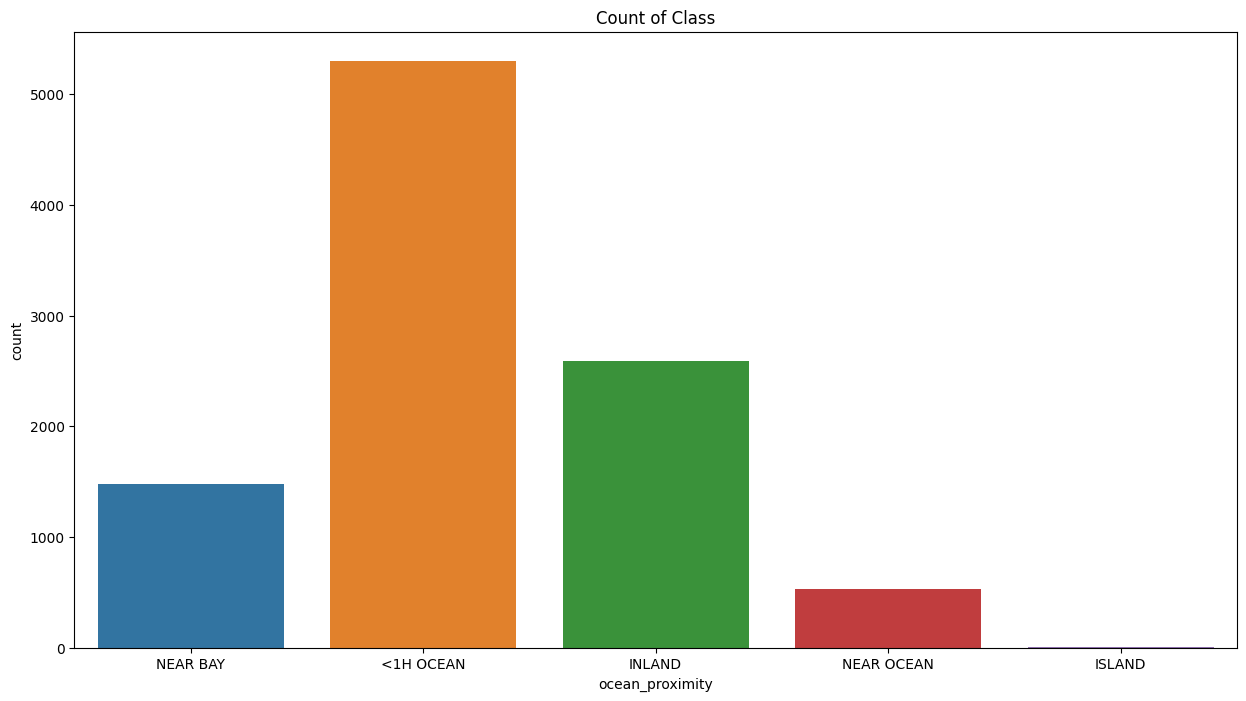

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=housing, x='ocean_proximity')

### 3.2 Biểu đồ histogram

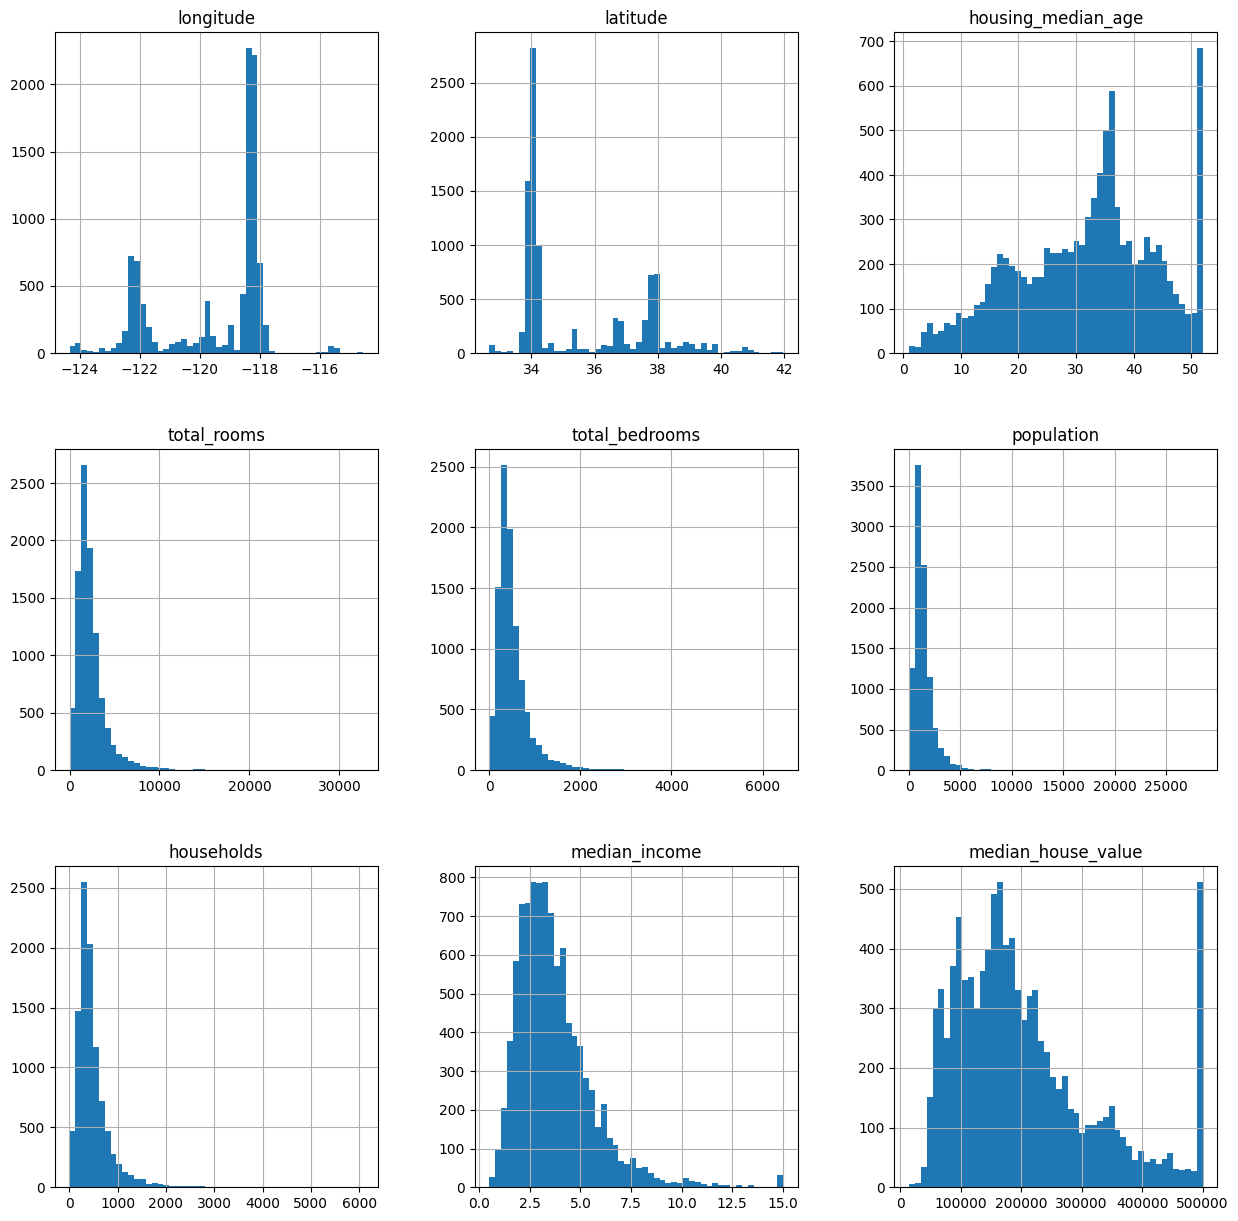

In [ ]:
housing.hist(figsize=(15,15),bins=50);

### 3.3 Ma trận tương quan

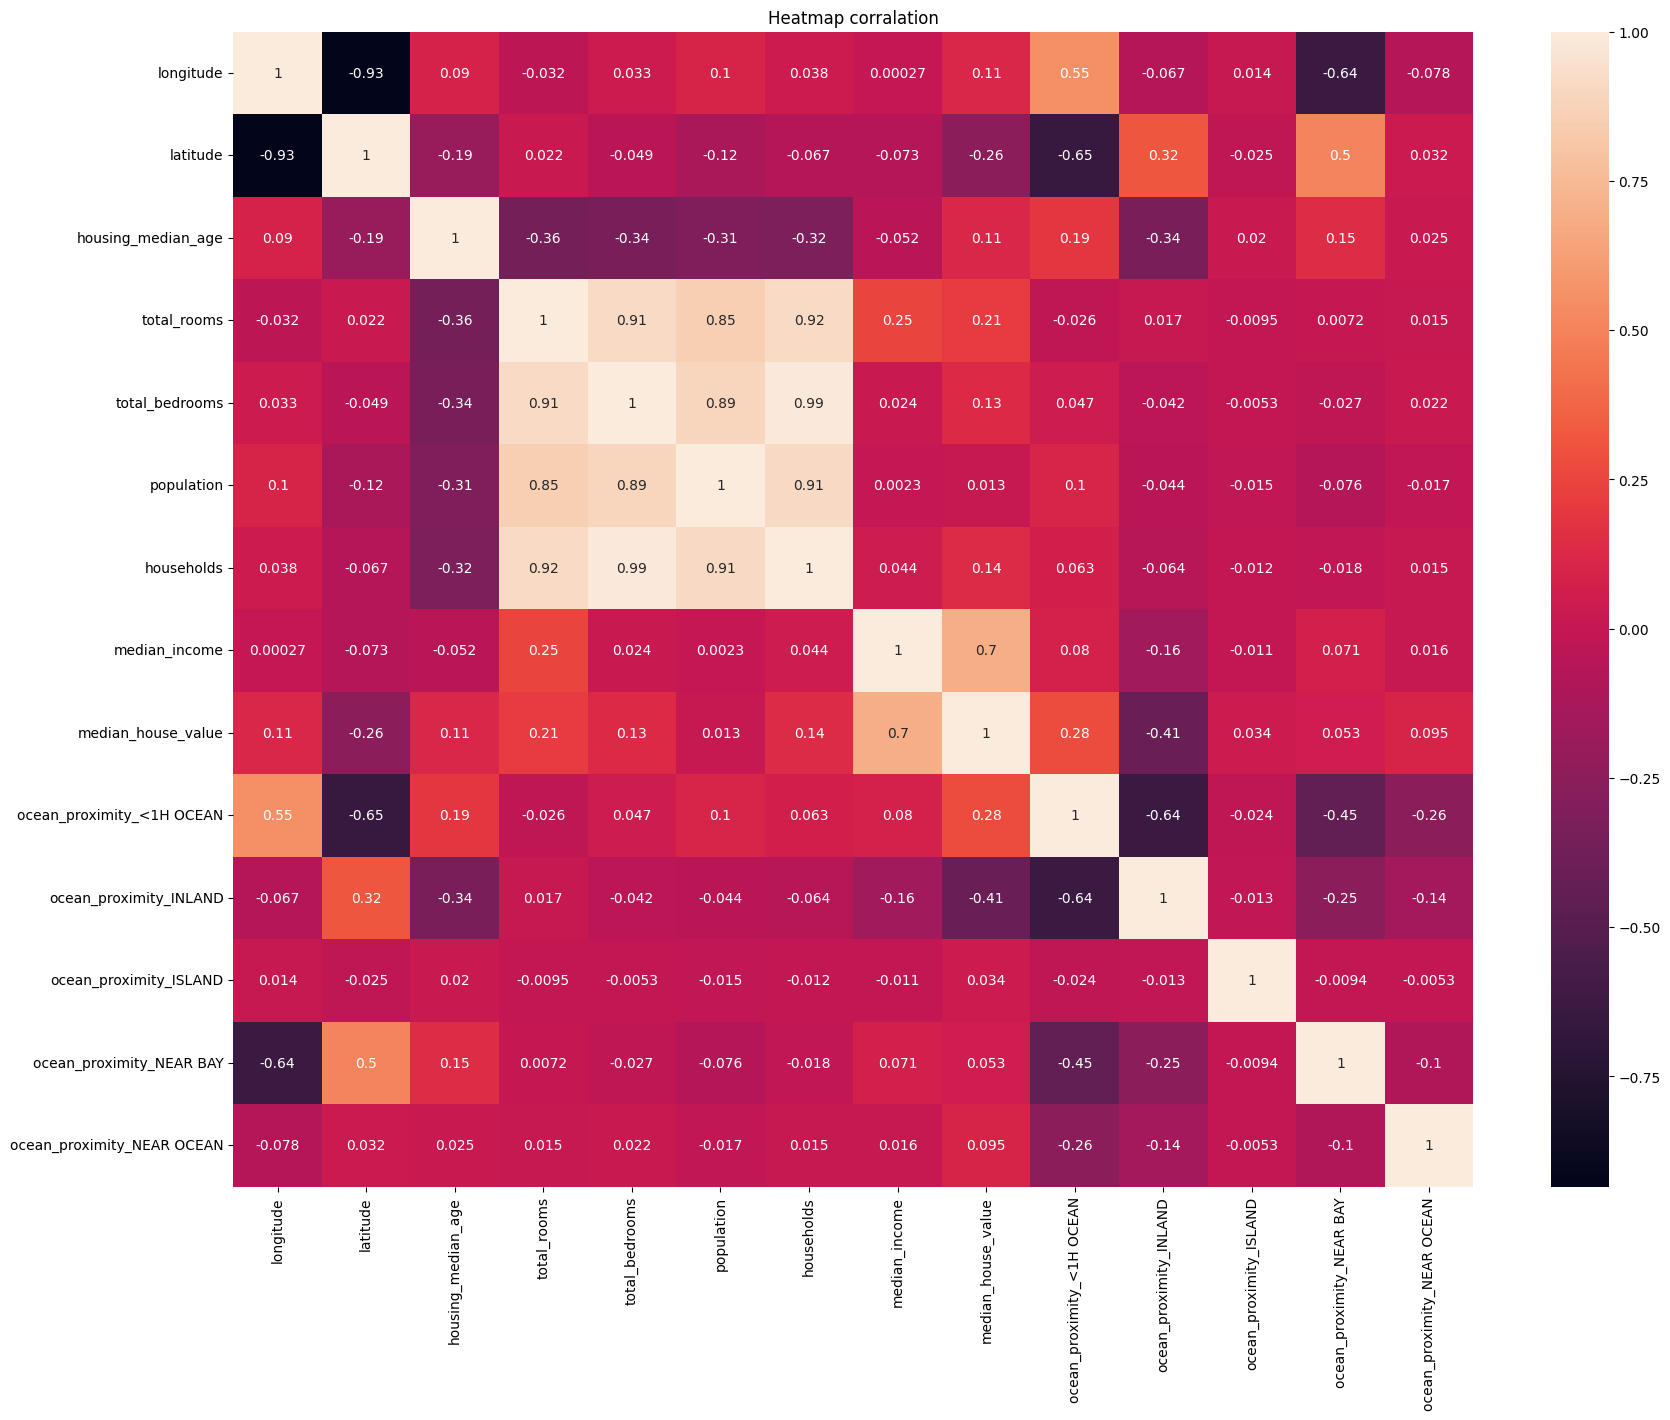

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Heatmap corralation')
sns.heatmap(data=pd.get_dummies(housing).corr(), annot=True);

# 4| Chuyển đổi cột 'oceanProximity' thành dạng số

### 4.1 Chuyển đổi thành dạng số

In [ ]:
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi cột 'oceanProximity' thành dạng số
housing['ocean_proximity'] = label_encoder.fit_transform(housing['ocean_proximity'])

# Hiển thị DataFrame sau khi chuyển đổi
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,-119.474091,35.495806,31.834040,2432.018081,516.539091,1394.115253,483.539293,3.718518,205109.199798,0.923939
std,1.809934,1.959813,11.835652,2033.336214,407.888407,1090.973983,379.324204,1.914634,116775.980064,1.268234
min,-124.350000,32.670000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000
25%,-121.600000,34.010000,23.000000,1357.750000,286.000000,779.000000,272.000000,2.410700,117800.000000,0.000000
50%,-118.410000,34.170000,33.000000,1962.000000,416.000000,1136.500000,389.000000,3.329350,176700.000000,0.000000
75%,-118.210000,37.630000,40.000000,2863.000000,617.250000,1681.750000,576.000000,4.547950,258300.000000,1.000000
max,-114.550000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,4.000000


# 5 | Modeling

In [ ]:
# Xác định các đặc trưng (X) và biến mục tiêu (y)
X = housing.drop('ocean_proximity', axis=1)
y = housing['ocean_proximity']

In [ ]:
# Chia dữ liệu thành bộ huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Hiển thị kích thước của từng tập
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (7920, 9)
X_test: (1980, 9)
y_train: (7920,)
y_test: (1980,)


In [ ]:
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1676,-122.26,38.04,41,2512,539.0,1179,480,2.6940,123000
1424,-122.03,37.98,16,1209,477.0,627,482,1.3894,156300
7380,-118.24,33.97,37,1053,263.0,1354,292,2.5833,112500
4751,-118.32,34.04,39,1294,330.0,1140,313,2.2554,165000
6260,-117.95,34.04,36,1044,200.0,982,205,4.7679,153900
6984,-118.02,33.96,36,2071,398.0,988,404,4.6226,219700
748,-122.09,37.66,39,1160,259.0,725,274,2.2222,158300
6416,-118.02,34.14,31,6854,1578.0,4131,1524,3.5878,222800
5823,-118.34,34.21,36,1834,316.0,864,309,4.7885,302200
6420,-117.98,34.14,27,6341,1289.0,2899,1192,3.6336,235200


### 5.1 Decision Tree

In [ ]:
# Khởi tạo mô hình Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Huấn luyện mô hình trên bộ dữ liệu huấn luyện
dt_classifier.fit(X_train, y_train)

# Dự đoán trên bộ dữ liệu kiểm tra
y_pred = dt_classifier.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9025252525252525


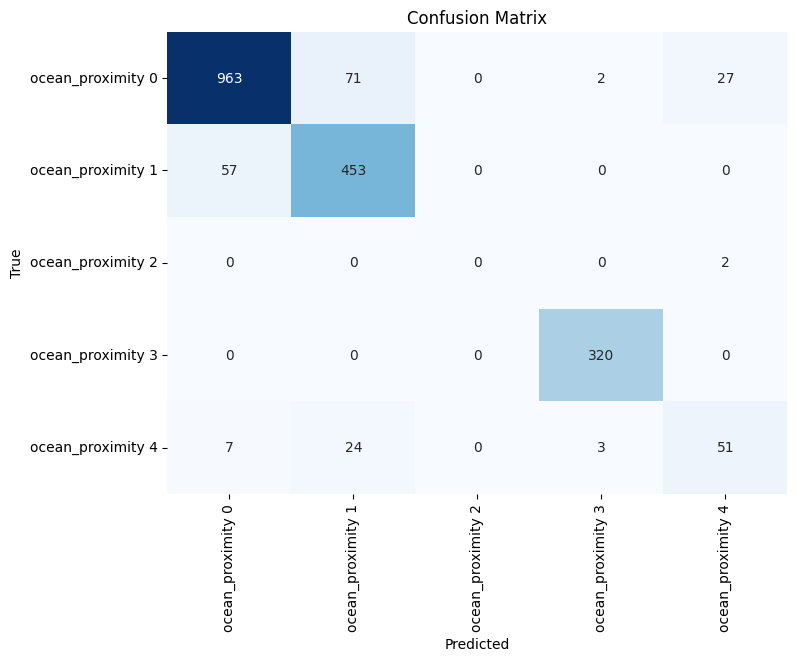

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ocean_proximity 0', 'ocean_proximity 1', 'ocean_proximity 2', 'ocean_proximity 3', 'ocean_proximity 4'], yticklabels=['ocean_proximity 0', 'ocean_proximity 1', 'ocean_proximity 2', 'ocean_proximity 3', 'ocean_proximity 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

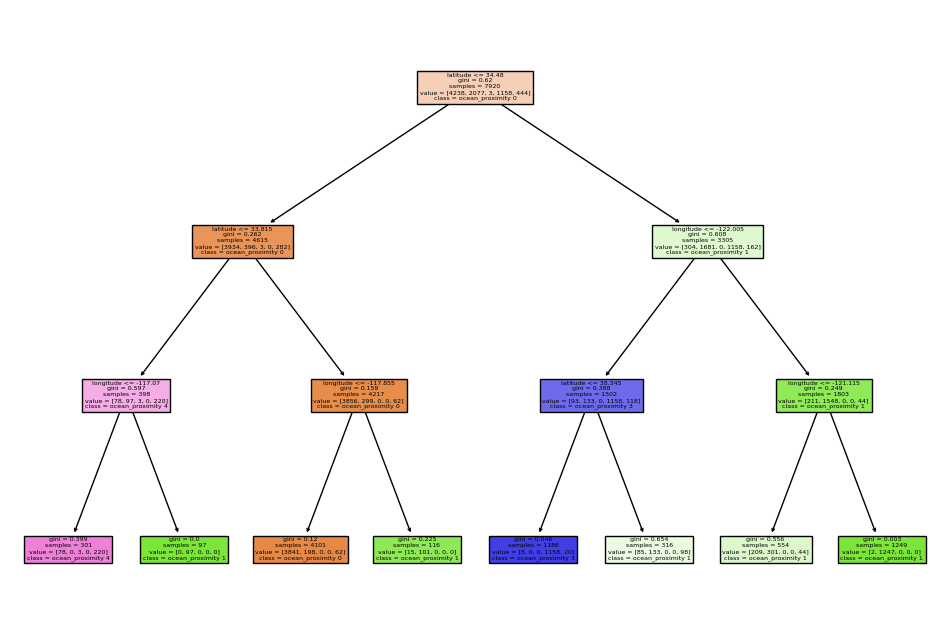

In [ ]:
# Trực quan hóa cây quyết định
# hiển thị biểu đồ của cây quyết định
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["ocean_proximity 0", "ocean_proximity 1", "ocean_proximity 2", "ocean_proximity 3", "ocean_proximity 4"])
plt.show()

In [ ]:
# TÌM ĐỘ XÂU TỐT NHẤT TỐI ĐA CHO THUẬT TOÁN
#Thiết lập các tham số cần tìm kiếm
max_depth_values = range(3, 20)

# Khởi tạo các biến để theo dõi độ sâu tối đa tốt nhất và điểm tương ứng
best_max_depth = None
best_score = 0.0

# Lặp lại các giá trị max_deep khác nhau
for max_depth in max_depth_values:
    # Khởi tạo DecisionTreeClassifier với max_deep hiện tại
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Đánh giá mô hình trên dữ liệu thử nghiệm
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # In điểm cho max_deep hiện tại
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Kiểm tra xem mô hình hiện tại có điểm cao hơn mô hình tốt nhất trước đó không
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# In độ sâu tối đa tốt nhất và điểm tương ứng
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.9025252525252525
Max Depth = 4: Test Score = 0.9297979797979798
Max Depth = 5: Test Score = 0.9515151515151515
Max Depth = 6: Test Score = 0.9702020202020202
Max Depth = 7: Test Score = 0.9722222222222222
Max Depth = 8: Test Score = 0.9772727272727273
Max Depth = 9: Test Score = 0.9762626262626263
Max Depth = 10: Test Score = 0.9777777777777777
Max Depth = 11: Test Score = 0.9772727272727273
Max Depth = 12: Test Score = 0.9762626262626263
Max Depth = 13: Test Score = 0.9762626262626263
Max Depth = 14: Test Score = 0.9762626262626263
Max Depth = 15: Test Score = 0.9737373737373738
Max Depth = 16: Test Score = 0.9762626262626263
Max Depth = 17: Test Score = 0.9767676767676767
Max Depth = 18: Test Score = 0.9782828282828283
Max Depth = 19: Test Score = 0.9782828282828283
Best Max Depth = 18: Best Test Score = 0.9782828282828283


In [ ]:
# đánh giá hiệu suất của một mô hình phân loại
from sklearn.model_selection import cross_val_score
# Thực hiện xác thực chéo 10 lần
scores = cross_val_score(clf, X, y, cv=10)
# In điểm xác thực chéo
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores: [0.84646465 0.89494949 0.97979798 0.96767677 0.81313131 0.77676768
 0.91818182 0.83131313 0.73434343 0.61111111]
Mean CV Score: 0.8373737373737373


In [ ]:
# Biểu diễn văn bản của cây quyết định
from sklearn.tree import export_text
# Xuất biểu diễn văn bản của cây quyết định
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- latitude <= 34.48
|   |--- latitude <= 33.82
|   |   |--- longitude <= -117.07
|   |   |   |--- latitude <= 33.78
|   |   |   |   |--- latitude <= 33.51
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- latitude >  33.51
|   |   |   |   |   |--- longitude <= -118.30
|   |   |   |   |   |   |--- latitude <= 33.75
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- latitude >  33.75
|   |   |   |   |   |   |   |--- median_income <= 7.29
|   |   |   |   |   |   |   |   |--- longitude <= -118.31
|   |   |   |   |   |   |   |   |   |--- median_income <= 6.48
|   |   |   |   |   |   |   |   |   |   |--- latitude <= 33.77
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |   |--- latitude >  33.77
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- median_income >  6.48
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- longitude >  -1

### 5.2 Linear Regression


In [ ]:
# Tạo dữ liệu mẫu
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình Linear Regression
linear_reg_model = LinearRegression()

# # Huấn luyện mô hình trên bộ dữ liệu huấn luyện
linear_reg_model.fit(X_train, y_train)

# Dự đoán trên bộ dữ liệu kiểm tra
y_pred = linear_reg_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.92


In [ ]:
# In ra các hệ số và hệ số chặn của mô hình
print("Hệ số :", linear_reg_model.coef_)
print("Hệ số chặn :", linear_reg_model.intercept_)

Hệ số : [-4.81676055e-01 -6.36500534e-02  9.23016393e-03  7.59085366e-05
  3.13146710e-04 -2.08407462e-04 -9.53946903e-05 -8.61596980e-03
 -1.34369910e-08]
Hệ số chặn : -54.63216383860005


In [ ]:
# y_test = y_test.values.reshape(-1, 1)

In [ ]:
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_test:", y_test.shape)

Kích thước X_test: (20, 1)
Kích thước y_test: (20, 1)


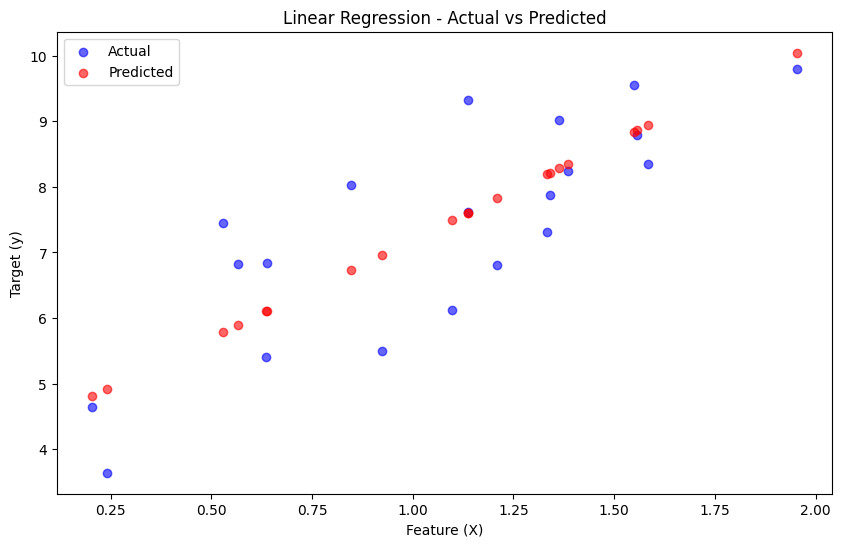

In [ ]:
# Vẽ đồ thị dự đoán so với thực tế
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)

plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

plt.show()